<a href="https://colab.research.google.com/github/bablu4195-1/deep-learning-one/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2025-12-03 15:16:13.787788: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-03 15:16:13.867716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-12-03 15:16:15.940272: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

 9551872/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training Data Shape: (60000, 28, 28)


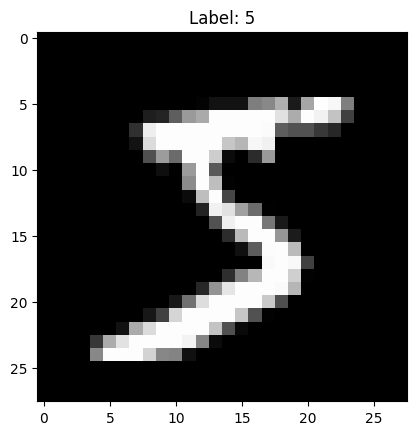

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
# X = The images (pixel data)
# y = The labels (the answer key, e.g., "5", "0", "9")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Check the "Shape" of the data
print(f"Training Data Shape: {X_train.shape}")

# 3. Visualize the first digit just to see what we are working with
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. Initialize the scaffolding
model = Sequential()

# 2. Add the Input Layer (The Flattener)
# Transforms the 28x28 square into a single line of 784 pixels
model.add(Flatten(input_shape=(28, 28)))

# 3. Add the Hidden Layer (The Feature Extractor)
# 128 neurons to find edges, loops, and shapes.
# 'relu' is the standard activation for hidden layers (it's fast!)
model.add(Dense(128, activation='relu'))

# 4. Add the Output Layer (The Scoreboard)
# 10 neurons (one for each digit 0-9)
# 'softmax' converts the scores into probabilities that add up to 100%
model.add(Dense(10, activation='softmax'))

# 5. Compile the Model (Tell it how to learn)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of what we just built
model.summary()

/home/jules/.pyenv/versions/3.12.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-12-03 15:16:18.177216: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Evaluate on the Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 7.07%


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the Data
# We grab the images (X) and the answers (y)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Optional: Normalize the data (Scale pixels from 0-255 down to 0-1)
# This helps the neural network learn faster and better.
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. Build the Model (The Architecture)
model = tf.keras.models.Sequential([
    # Input: Flatten the 28x28 images
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Hidden Layer: 128 neurons looking for features
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer: 10 neurons (one for each digit 0-9)
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Compile (The Settings)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train (The Learning)
print("--- Starting Training ---")
model.fit(X_train, y_train, epochs=5)

# 5. Evaluate (The Final Exam)
print("\n--- Final Test Evaluation ---")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

--- Starting Training ---


Epoch 1/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 24:56 799ms/step - accuracy: 0.1562 - loss: 2.2612

  18/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3622 - loss: 2.0723     

  36/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4732 - loss: 1.8332

  47/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5173 - loss: 1.7180

  57/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5486 - loss: 1.6291

  73/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5874 - loss: 1.5110

  91/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6205 - loss: 1.4043

 110/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6474 - loss: 1.3145

 128/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6673 - loss: 1.2445

 146/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6837 - loss: 1.1859

 165/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6981 - loss: 1.1332

 183/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7097 - loss: 1.0906

 201/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7199 - loss: 1.0529

 219/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7288 - loss: 1.0191

 237/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7368 - loss: 0.9887

 255/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7441 - loss: 0.9613

 272/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7503 - loss: 0.9377

 289/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7560 - loss: 0.9161

 306/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7613 - loss: 0.8960

 323/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7662 - loss: 0.8773

 342/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7713 - loss: 0.8580

 360/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7757 - loss: 0.8410

 379/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7801 - loss: 0.8243

 397/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7839 - loss: 0.8096

 416/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7876 - loss: 0.7950

 435/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7912 - loss: 0.7812

 454/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7946 - loss: 0.7681

 474/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7979 - loss: 0.7552

 491/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8006 - loss: 0.7447

 509/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8034 - loss: 0.7342

 527/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8060 - loss: 0.7242

 546/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8086 - loss: 0.7140

 565/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8111 - loss: 0.7043

 583/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8134 - loss: 0.6955

 601/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8156 - loss: 0.6871

 620/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8178 - loss: 0.6786

 638/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8198 - loss: 0.6708

 657/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8218 - loss: 0.6630

 675/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8236 - loss: 0.6558

 693/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8254 - loss: 0.6490

 711/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8271 - loss: 0.6424

 730/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8288 - loss: 0.6356

 749/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8305 - loss: 0.6292

 767/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8320 - loss: 0.6232

 785/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8335 - loss: 0.6175

 803/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8350 - loss: 0.6119

 822/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8365 - loss: 0.6062

 841/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8379 - loss: 0.6007

 859/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8392 - loss: 0.5956

 877/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8405 - loss: 0.5907

 895/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8417 - loss: 0.5859

 913/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8429 - loss: 0.5813

 931/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8441 - loss: 0.5768

 948/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8452 - loss: 0.5726

 966/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8463 - loss: 0.5683

 984/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8474 - loss: 0.5641

1002/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8485 - loss: 0.5601

1020/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8495 - loss: 0.5561

1039/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8506 - loss: 0.5520

1058/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8516 - loss: 0.5480

1077/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8526 - loss: 0.5441

1096/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8536 - loss: 0.5403

1114/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.5368

1133/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8554 - loss: 0.5331

1152/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8564 - loss: 0.5296

1171/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8573 - loss: 0.5261

1190/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.5228

1209/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.5194

1228/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.5162

1246/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8606 - loss: 0.5132

1265/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.5101

1284/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.5071

1303/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.5041

1322/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8637 - loss: 0.5012

1341/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.4983

1360/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 0.4955

1378/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8659 - loss: 0.4929

1396/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.4903

1414/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8672 - loss: 0.4877

1433/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.4851

1452/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.4826

1471/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8692 - loss: 0.4800

1490/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.4776

1509/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.4751

1528/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.4728

1547/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.4704

1566/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.4681

1585/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8729 - loss: 0.4658

1604/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8735 - loss: 0.4636

1623/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.4614

1642/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8746 - loss: 0.4593

1661/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.4571

1680/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8757 - loss: 0.4551

1699/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8762 - loss: 0.4530

1718/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.4510

1737/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8773 - loss: 0.4490

1756/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.4470

1775/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.4451

1794/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8788 - loss: 0.4432

1814/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.4412

1833/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.4394

1852/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.4376

1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.4359

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9268 - loss: 0.2601


Epoch 2/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.9688 - loss: 0.1046

  20/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9597 - loss: 0.1239  

  39/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9576 - loss: 0.1335

  58/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9569 - loss: 0.1381

  71/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9573 - loss: 0.1385

  91/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9577 - loss: 0.1390

 110/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9580 - loss: 0.1385

 129/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9585 - loss: 0.1376

 148/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9590 - loss: 0.1368

 167/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9593 - loss: 0.1363

 186/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9595 - loss: 0.1358

 205/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9596 - loss: 0.1355

 224/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9598 - loss: 0.1351

 243/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9600 - loss: 0.1347

 262/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9602 - loss: 0.1343

 281/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9603 - loss: 0.1340

 300/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9605 - loss: 0.1337

 320/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9606 - loss: 0.1334

 339/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9608 - loss: 0.1331

 358/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9609 - loss: 0.1327

 377/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9610 - loss: 0.1325

 396/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9612 - loss: 0.1322

 415/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9613 - loss: 0.1320

 434/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9614 - loss: 0.1318

 454/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9615 - loss: 0.1316

 473/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9616 - loss: 0.1314

 493/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9617 - loss: 0.1311

 512/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9618 - loss: 0.1309

 531/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9619 - loss: 0.1307

 550/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9620 - loss: 0.1306

 569/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9620 - loss: 0.1304

 588/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9621 - loss: 0.1303

 607/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9622 - loss: 0.1301

 626/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9623 - loss: 0.1300

 645/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9623 - loss: 0.1299

 664/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9624 - loss: 0.1297

 683/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9624 - loss: 0.1295

 702/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9625 - loss: 0.1294

 721/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9625 - loss: 0.1292

 740/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9626 - loss: 0.1290

 759/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9627 - loss: 0.1289

 778/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9627 - loss: 0.1287

 798/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9628 - loss: 0.1285

 817/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9628 - loss: 0.1284

 836/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9629 - loss: 0.1282

 855/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9629 - loss: 0.1280

 875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9630 - loss: 0.1279

 895/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9630 - loss: 0.1277

 915/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9631 - loss: 0.1275

 934/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9632 - loss: 0.1273

 953/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9632 - loss: 0.1272

 973/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9633 - loss: 0.1270

 993/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9633 - loss: 0.1268

1012/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9633 - loss: 0.1267

1031/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9634 - loss: 0.1266

1051/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9634 - loss: 0.1264

1071/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9635 - loss: 0.1263

1091/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9635 - loss: 0.1262

1111/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9635 - loss: 0.1261

1130/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1259

1149/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1258

1168/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1257

1187/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1257

1206/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1256

1225/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1255

1245/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1254

1264/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1253

1283/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1252

1303/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1252

1322/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1251

1341/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1250

1359/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.1250

1378/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1249

1398/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1249

1417/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1248

1437/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1247

1457/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1247

1477/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1246

1496/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9640 - loss: 0.1245

1515/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.1245

1534/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.1244

1554/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.1243

1573/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.1242

1592/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.1242

1612/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1241

1632/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1240

1652/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1239

1671/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1238

1690/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1237

1709/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1236

1728/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1236

1747/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1235

1766/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1234

1785/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1233

1804/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1232

1823/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1232

1843/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1231

1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1230

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9660 - loss: 0.1153


Epoch 3/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 1.0000 - loss: 0.0434

  20/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9723 - loss: 0.1018  

  39/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9722 - loss: 0.0942

  58/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9734 - loss: 0.0887

  77/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9742 - loss: 0.0856

  96/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9745 - loss: 0.0835

 115/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9748 - loss: 0.0820

 135/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9750 - loss: 0.0809

 154/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9752 - loss: 0.0803

 173/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9752 - loss: 0.0799

 191/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9753 - loss: 0.0795

 210/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9755 - loss: 0.0791

 230/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9756 - loss: 0.0789

 249/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9757 - loss: 0.0786

 268/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9759 - loss: 0.0782

 288/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9760 - loss: 0.0779

 307/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9761 - loss: 0.0776

 327/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9762 - loss: 0.0773

 347/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9763 - loss: 0.0770

 367/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0767

 387/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0764

 407/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0762

 426/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0760

 445/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0760

 465/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0759

 484/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0759

 504/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0759

 524/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0758

 544/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0758

 563/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0758

 582/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0758

 601/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0757

 620/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0757

 639/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0757

 658/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0757

 678/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0757

 697/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0757

 717/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9766 - loss: 0.0758

 737/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0758

 756/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0759

 775/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0759

 794/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0760

 812/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0760

 831/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0761

 850/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0761

 869/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0762

 886/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0763

 904/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0763

 923/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0764

 942/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0764

 961/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0765

 980/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.0766

 999/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0766

1017/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0767

1035/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0768

1054/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0768

1073/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0769

1092/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0769

1111/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0770

1130/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0770

1150/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0771

1169/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0771

1188/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0772

1207/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0772

1226/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0772

1245/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0773

1264/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0773

1283/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0773

1302/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0774

1320/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0774

1339/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0774

1358/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0775

1377/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0775

1396/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0776

1415/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0776

1434/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0776

1453/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0777

1472/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0777

1491/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0777

1511/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0778

1530/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0778

1548/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0779

1567/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0779

1586/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0779

1605/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0780

1624/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0780

1643/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0780

1661/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0781

1680/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0781

1699/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0781

1718/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0782

1737/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0782

1757/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0782

1776/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0783

1796/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0783

1815/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9759 - loss: 0.0783

1834/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0784

1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0784

1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0784

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0.0810


Epoch 4/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9688 - loss: 0.0845

  19/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0645  

  37/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0638

  56/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0639

  75/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0637

  93/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0634

 112/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0630

 130/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9821 - loss: 0.0627

 149/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9820 - loss: 0.0625

 168/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9818 - loss: 0.0622

 186/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0619

 205/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0615

 224/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0611

 242/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0609

 261/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9816 - loss: 0.0609

 280/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9816 - loss: 0.0608

 298/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9816 - loss: 0.0608

 317/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0608

 336/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0608

 355/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9814 - loss: 0.0607

 374/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9814 - loss: 0.0607

 393/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9813 - loss: 0.0606

 411/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9813 - loss: 0.0605

 430/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9813 - loss: 0.0604

 449/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9813 - loss: 0.0603

 468/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0603

 487/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0602

 506/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0601

 524/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0601

 542/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0600

 560/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0600

 577/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0599

 595/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0599

 613/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0599

 631/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0599

 650/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9812 - loss: 0.0599

 669/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 688/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 708/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 727/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 746/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 765/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 784/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 803/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9811 - loss: 0.0599

 820/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0599

 836/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0599

 853/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0600

 870/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0600

 887/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0600

 905/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0600

 924/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0601

 943/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0601

 962/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0601

 981/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0601

1001/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0601

1020/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0601

1040/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0601

1059/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1078/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1097/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1116/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1136/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1156/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1175/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1194/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1213/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1232/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0602

1250/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1268/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1286/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1305/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1323/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1342/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1361/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1380/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0603

1400/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1419/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1437/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1455/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1473/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1492/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1511/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1530/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1549/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1568/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1587/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1605/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1624/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1642/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1660/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1679/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0604

1698/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0605

1717/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0605

1736/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0605

1755/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0605

1774/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0605

1793/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0605

1812/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0605

1831/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0605

1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0605

1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0605

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0606


Epoch 5/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 1.0000 - loss: 0.0325

  19/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0670  

  38/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0601

  57/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0558

  75/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9858 - loss: 0.0537

  89/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0529

 108/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0520

 126/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9859 - loss: 0.0512

 144/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9861 - loss: 0.0506

 162/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9862 - loss: 0.0502

 181/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9863 - loss: 0.0498

 200/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9864 - loss: 0.0493

 219/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9864 - loss: 0.0491

 238/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9864 - loss: 0.0489

 256/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0486

 275/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0484

 293/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0481

 312/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0480

 331/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0478

 335/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0478

 347/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0477

 363/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0476

 382/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0476

 400/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0476

 419/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0475

 439/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0475

 458/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0475

 477/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0475

 496/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0475

 516/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0475

 535/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0474

 554/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0474

 573/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9865 - loss: 0.0474

 591/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0474

 610/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0474

 629/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0474

 648/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0474

 667/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0473

 686/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0473

 705/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0472

 724/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0472

 742/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0472

 760/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0471

 779/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0471

 798/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0471

 817/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0471

 836/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0470

 855/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0470

 874/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0470

 894/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0470

 913/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0469

 932/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0469

 951/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0469

 970/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0468

 989/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0468

1007/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0468

1026/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0468

1044/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0467

1062/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0467

1081/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0467

1099/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0466

1118/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0466

1136/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0466

1154/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0466

1172/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0465

1190/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0465

1208/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0465

1227/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0464

1245/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0464

1263/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0464

1282/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0464

1301/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0463

1320/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0463

1338/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0463

1357/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0463

1375/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0463

1394/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0462

1412/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0462

1430/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0462

1449/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0462

1467/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0462

1486/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0462

1505/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0462

1524/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1543/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1561/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1579/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1597/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1616/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1633/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1650/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1669/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1686/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1698/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1710/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1722/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1735/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1747/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1759/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0461

1771/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0461

1785/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0461

1799/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0461

1811/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0461

1823/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0462

1834/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0462

1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0462

1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0462

1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0462

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0472



--- Final Test Evaluation ---


Test Accuracy: 97.86%


In [5]:
import numpy as np

print(f"Max value in Training Data: {X_train.max()}")
print(f"Min value in Training Data: {X_train.min()}")

Max value in Training Data: 1.0
Min value in Training Data: 0.0


  1/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step

 31/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

 57/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

 82/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

107/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

132/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

169/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

172/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

188/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

216/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

246/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

278/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


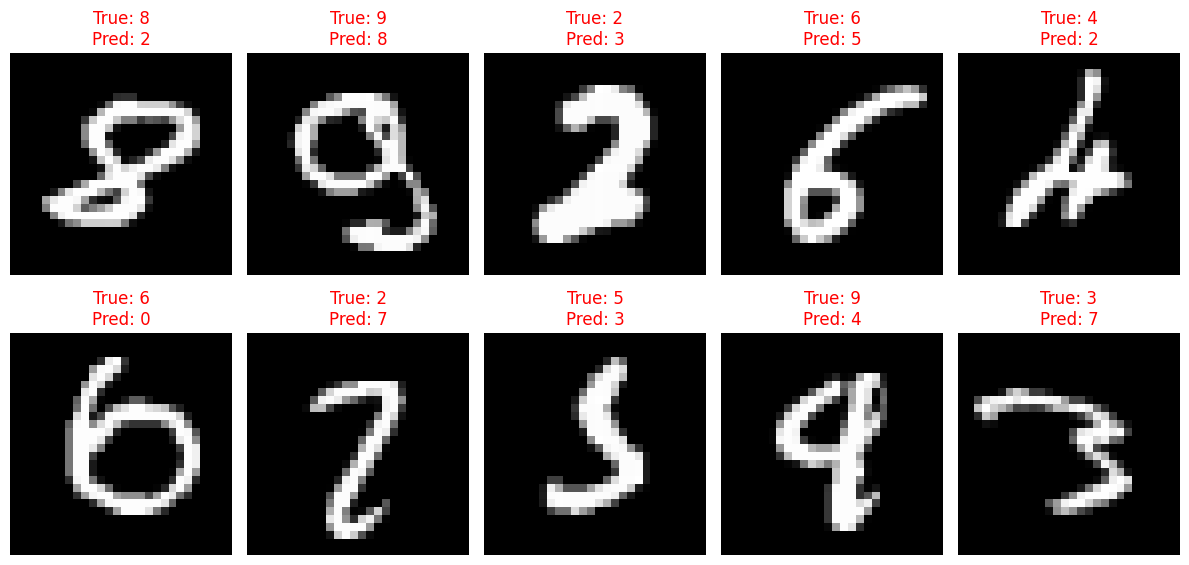

Total Errors found: 214


In [6]:
import numpy as np

# 1. Get the model's predictions for the Test Set
predictions = model.predict(X_test)
# Convert probabilities (0.9, 0.01, etc.) to class labels (0, 1, ... 9)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Find the indices where the prediction did NOT match the answer
# This creates a list of all the mistake locations
mistake_indices = np.where(predicted_classes != y_test)[0]

# 3. Plot the first 10 mistakes
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = mistake_indices[i]
    ax = plt.subplot(2, 5, i + 1)

    # Reshape back to 28x28 just in case
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')

    # Title shows the Truth vs. The Mistake
    plt.title(f"True: {y_test[idx]}\nPred: {predicted_classes[idx]}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Total Errors found: {len(mistake_indices)}")

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Reshape the data
# CNNs need shape (28, 28, 1) -> (Height, Width, Color Channels)
# -1 means "keep the number of images the same"
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# 2. Build the CNN
model_cnn = models.Sequential([
    # Step 1: Convolution (Find features like edges)
    # 32 filters, each 3x3 pixels size
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Step 2: Max Pooling (Shrink image by half)
    layers.MaxPooling2D((2, 2)),

    # Step 3: Flatten (Grid -> Line)
    layers.Flatten(),

    # Step 4: Dense Layers (The decision makers)
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Compile
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 4. Train (Notice we use X_train_cnn now)
print("--- Training CNN ---")
model_cnn.fit(X_train_cnn, y_train, epochs=5)

# 5. Evaluate
print("\n--- Final Test Evaluation ---")
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {test_acc * 100:.2f}%")

--- Training CNN ---


/home/jules/.pyenv/versions/3.12.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 35:54 1s/step - accuracy: 0.0312 - loss: 2.3264

   6/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1698 - loss: 2.2425

  11/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.2315 - loss: 2.1833

  17/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3004 - loss: 2.0997

  23/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3555 - loss: 2.0122

  29/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3999 - loss: 1.9237 

  35/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.4353 - loss: 1.8422

  41/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4655 - loss: 1.7651

  48/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4951 - loss: 1.6832

  54/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5170 - loss: 1.6193

  60/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5365 - loss: 1.5612

  67/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5567 - loss: 1.5001

  74/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5745 - loss: 1.4451

  81/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5902 - loss: 1.3957

  88/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6044 - loss: 1.3511

  95/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6172 - loss: 1.3103

 102/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6289 - loss: 1.2728

 109/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6395 - loss: 1.2384

 116/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6491 - loss: 1.2070

 123/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6578 - loss: 1.1785

 130/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6658 - loss: 1.1522

 136/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6721 - loss: 1.1312

 143/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6790 - loss: 1.1082

 150/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6856 - loss: 1.0864

 157/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6917 - loss: 1.0659

 164/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6974 - loss: 1.0465

 171/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7029 - loss: 1.0280

 178/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7080 - loss: 1.0106

 185/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7128 - loss: 0.9942

 192/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7174 - loss: 0.9786

 199/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7217 - loss: 0.9637

 206/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7259 - loss: 0.9495

 213/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7298 - loss: 0.9359

 220/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7336 - loss: 0.9228

 227/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7373 - loss: 0.9102

 234/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7408 - loss: 0.8981

 241/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7441 - loss: 0.8866

 248/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7473 - loss: 0.8754

 255/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7504 - loss: 0.8647

 262/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7534 - loss: 0.8544

 269/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7563 - loss: 0.8445

 276/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7591 - loss: 0.8350

 283/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7617 - loss: 0.8257

 290/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7643 - loss: 0.8168

 297/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7668 - loss: 0.8082

 304/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7692 - loss: 0.7998

 311/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7716 - loss: 0.7917

 318/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7739 - loss: 0.7839

 325/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7761 - loss: 0.7762

 332/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7783 - loss: 0.7688

 339/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7804 - loss: 0.7615

 346/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7824 - loss: 0.7545

 353/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7844 - loss: 0.7477

 360/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7863 - loss: 0.7411

 367/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7882 - loss: 0.7346

 374/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7901 - loss: 0.7283

 381/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7918 - loss: 0.7222

 388/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7936 - loss: 0.7162

 395/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7953 - loss: 0.7103

 402/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7969 - loss: 0.7046

 409/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7986 - loss: 0.6990

 416/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8001 - loss: 0.6936

 423/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8017 - loss: 0.6882

 430/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8032 - loss: 0.6830

 437/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8047 - loss: 0.6779

 444/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8061 - loss: 0.6729

 451/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8076 - loss: 0.6680

 458/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8090 - loss: 0.6632

 465/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8103 - loss: 0.6584

 472/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8117 - loss: 0.6538

 479/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8130 - loss: 0.6493

 486/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8143 - loss: 0.6448

 493/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8156 - loss: 0.6405

 500/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8168 - loss: 0.6362

 507/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8180 - loss: 0.6321

 514/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8192 - loss: 0.6280

 521/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8204 - loss: 0.6240

 528/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8215 - loss: 0.6201

 535/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8226 - loss: 0.6162

 542/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8237 - loss: 0.6124

 549/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8248 - loss: 0.6087

 556/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8258 - loss: 0.6051

 563/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8269 - loss: 0.6015

 570/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8279 - loss: 0.5980

 577/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8289 - loss: 0.5946

 584/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8298 - loss: 0.5912

 591/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8308 - loss: 0.5879

 598/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8317 - loss: 0.5846 

 605/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8327 - loss: 0.5814

 612/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8336 - loss: 0.5782

 619/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8345 - loss: 0.5751

 626/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8354 - loss: 0.5720

 633/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8362 - loss: 0.5690

 640/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8371 - loss: 0.5660

 647/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8380 - loss: 0.5630

 654/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8388 - loss: 0.5602

 661/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8396 - loss: 0.5573

 668/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8404 - loss: 0.5545

 675/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8412 - loss: 0.5518

 682/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8420 - loss: 0.5490

 689/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8428 - loss: 0.5464

 696/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8435 - loss: 0.5437

 703/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8443 - loss: 0.5411

 710/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8450 - loss: 0.5386

 717/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8458 - loss: 0.5360

 724/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8465 - loss: 0.5335

 731/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8472 - loss: 0.5311

 737/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8478 - loss: 0.5290

 744/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8485 - loss: 0.5266

 751/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8492 - loss: 0.5242

 758/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8499 - loss: 0.5219

 765/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8505 - loss: 0.5196

 772/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8512 - loss: 0.5173

 779/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8519 - loss: 0.5150

 786/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8525 - loss: 0.5128

 793/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8531 - loss: 0.5106

 800/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8538 - loss: 0.5084

 807/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8544 - loss: 0.5062

 814/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8550 - loss: 0.5041

 821/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8556 - loss: 0.5020

 828/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8562 - loss: 0.4999

 835/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8568 - loss: 0.4979

 842/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8574 - loss: 0.4959

 849/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8580 - loss: 0.4939

 856/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8585 - loss: 0.4919

 863/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8591 - loss: 0.4899

 870/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8597 - loss: 0.4880

 877/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8602 - loss: 0.4861

 884/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8607 - loss: 0.4842

 891/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8613 - loss: 0.4823

 898/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8618 - loss: 0.4804

 905/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8623 - loss: 0.4786

 912/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8629 - loss: 0.4768

 919/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8634 - loss: 0.4750

 926/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8639 - loss: 0.4732

 933/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8644 - loss: 0.4715

 940/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8649 - loss: 0.4697

 947/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8654 - loss: 0.4680

 953/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8658 - loss: 0.4666

 959/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8662 - loss: 0.4651

 966/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8667 - loss: 0.4634

 973/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8672 - loss: 0.4618

 980/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8677 - loss: 0.4601

 987/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8681 - loss: 0.4585

 994/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8686 - loss: 0.4569

1001/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8690 - loss: 0.4553

1008/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8695 - loss: 0.4538

1015/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8699 - loss: 0.4522

1022/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8704 - loss: 0.4507

1029/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8708 - loss: 0.4492

1036/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8713 - loss: 0.4477

1043/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8717 - loss: 0.4462

1050/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8721 - loss: 0.4447

1057/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8725 - loss: 0.4432

1064/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8730 - loss: 0.4418

1070/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8733 - loss: 0.4405

1077/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8737 - loss: 0.4391

1083/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8741 - loss: 0.4379

1089/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8744 - loss: 0.4367

1095/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8748 - loss: 0.4355

1101/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8751 - loss: 0.4343

1107/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8755 - loss: 0.4332

1113/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8758 - loss: 0.4320

1120/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8762 - loss: 0.4306

1127/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8766 - loss: 0.4293

1134/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8769 - loss: 0.4280

1141/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8773 - loss: 0.4267

1147/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8776 - loss: 0.4255

1153/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8780 - loss: 0.4244

1159/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8783 - loss: 0.4233

1165/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8786 - loss: 0.4223

1171/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8789 - loss: 0.4212

1178/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8793 - loss: 0.4199

1185/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8796 - loss: 0.4187

1191/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8799 - loss: 0.4176

1197/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8802 - loss: 0.4166

1204/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8806 - loss: 0.4154

1211/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8809 - loss: 0.4142

1218/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8813 - loss: 0.4130

1225/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8816 - loss: 0.4118

1232/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8819 - loss: 0.4106

1239/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8823 - loss: 0.4095

1246/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8826 - loss: 0.4083

1253/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8829 - loss: 0.4072

1260/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8832 - loss: 0.4060

1267/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8836 - loss: 0.4049

1274/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8839 - loss: 0.4038

1281/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8842 - loss: 0.4027

1288/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8845 - loss: 0.4016

1295/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8848 - loss: 0.4005

1302/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8851 - loss: 0.3994

1309/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8854 - loss: 0.3984

1316/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8857 - loss: 0.3973

1323/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8860 - loss: 0.3963

1330/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8863 - loss: 0.3952

1337/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8866 - loss: 0.3942

1344/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8869 - loss: 0.3931

1351/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8872 - loss: 0.3921

1358/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8875 - loss: 0.3911

1365/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8878 - loss: 0.3901

1371/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8880 - loss: 0.3892

1377/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8883 - loss: 0.3884

1383/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8885 - loss: 0.3876

1389/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8888 - loss: 0.3867

1395/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8890 - loss: 0.3859

1401/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8892 - loss: 0.3851

1407/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8895 - loss: 0.3842

1413/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8897 - loss: 0.3834

1419/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8899 - loss: 0.3826

1425/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8902 - loss: 0.3818

1431/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8904 - loss: 0.3810

1438/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8907 - loss: 0.3801

1444/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8909 - loss: 0.3793

1450/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8911 - loss: 0.3785

1457/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8914 - loss: 0.3776

1464/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8916 - loss: 0.3767

1470/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8918 - loss: 0.3759

1476/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8921 - loss: 0.3751

1482/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8923 - loss: 0.3744

1488/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8925 - loss: 0.3736

1495/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8928 - loss: 0.3727

1502/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8930 - loss: 0.3719

1509/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8932 - loss: 0.3710

1515/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8935 - loss: 0.3703

1522/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8937 - loss: 0.3694

1529/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8939 - loss: 0.3686

1536/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8942 - loss: 0.3677

1543/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8944 - loss: 0.3669

1550/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8947 - loss: 0.3660

1557/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8949 - loss: 0.3652

1564/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8951 - loss: 0.3644

1571/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8954 - loss: 0.3636

1578/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8956 - loss: 0.3628

1585/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8958 - loss: 0.3619

1592/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8961 - loss: 0.3611

1599/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8963 - loss: 0.3603

1606/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8965 - loss: 0.3596

1612/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8967 - loss: 0.3589

1618/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8969 - loss: 0.3582

1624/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8971 - loss: 0.3575

1631/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8973 - loss: 0.3568

1638/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8975 - loss: 0.3560

1644/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8977 - loss: 0.3553

1651/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8979 - loss: 0.3546

1658/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8982 - loss: 0.3538

1664/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8983 - loss: 0.3532

1671/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8986 - loss: 0.3524

1678/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8988 - loss: 0.3517

1685/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8990 - loss: 0.3509

1691/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8992 - loss: 0.3503

1698/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8994 - loss: 0.3496

1704/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8995 - loss: 0.3489

1710/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8997 - loss: 0.3483

1716/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8999 - loss: 0.3477

1723/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9001 - loss: 0.3470

1729/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9003 - loss: 0.3464

1736/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9005 - loss: 0.3457

1743/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9007 - loss: 0.3450

1750/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9009 - loss: 0.3443

1757/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9011 - loss: 0.3436

1764/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9013 - loss: 0.3429

1771/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9015 - loss: 0.3422

1778/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9017 - loss: 0.3415

1784/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9018 - loss: 0.3409

1791/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9020 - loss: 0.3403

1797/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9022 - loss: 0.3397

1803/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9023 - loss: 0.3391

1810/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9025 - loss: 0.3384

1816/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9027 - loss: 0.3379

1823/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9029 - loss: 0.3372

1830/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9031 - loss: 0.3366

1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9032 - loss: 0.3360

1843/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9034 - loss: 0.3354

1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9036 - loss: 0.3347

1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9038 - loss: 0.3341

1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9040 - loss: 0.3334

1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9041 - loss: 0.3328

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9522 - loss: 0.1644


Epoch 2/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:00 32ms/step - accuracy: 0.9688 - loss: 0.0797

   8/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9738 - loss: 0.0722  

  14/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9773 - loss: 0.0650

  20/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9781 - loss: 0.0631

  26/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9787 - loss: 0.0622

  33/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9792 - loss: 0.0615

  40/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9788 - loss: 0.0624

  47/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9783 - loss: 0.0634

  54/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9780 - loss: 0.0640

  61/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9779 - loss: 0.0640

  68/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9779 - loss: 0.0639

  75/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9780 - loss: 0.0638

  82/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9780 - loss: 0.0637

  89/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9781 - loss: 0.0635

  96/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9782 - loss: 0.0632

 103/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9784 - loss: 0.0631

 110/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9785 - loss: 0.0629

 117/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9786 - loss: 0.0627

 124/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9788 - loss: 0.0625

 131/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9789 - loss: 0.0623

 138/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9790 - loss: 0.0621

 145/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9792 - loss: 0.0618

 152/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9793 - loss: 0.0616

 159/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9794 - loss: 0.0613

 166/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9795 - loss: 0.0611

 172/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9795 - loss: 0.0609

 179/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9796 - loss: 0.0607

 186/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9797 - loss: 0.0606

 193/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9797 - loss: 0.0605

 199/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9798 - loss: 0.0603

 205/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9798 - loss: 0.0602

 212/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9799 - loss: 0.0601

 219/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9799 - loss: 0.0600

 226/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9800 - loss: 0.0599

 233/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9800 - loss: 0.0597

 240/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9801 - loss: 0.0596

 247/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9801 - loss: 0.0596

 253/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9801 - loss: 0.0595

 259/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9802 - loss: 0.0595

 265/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9802 - loss: 0.0594

 271/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9802 - loss: 0.0594

 277/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9802 - loss: 0.0594

 283/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9803 - loss: 0.0594

 290/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9803 - loss: 0.0593

 297/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9803 - loss: 0.0593

 304/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9803 - loss: 0.0593

 310/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9804 - loss: 0.0593

 316/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9804 - loss: 0.0592

 322/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9804 - loss: 0.0592

 328/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9804 - loss: 0.0592

 334/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9804 - loss: 0.0592

 340/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9805 - loss: 0.0592

 347/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9805 - loss: 0.0592

 354/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9805 - loss: 0.0593

 361/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9805 - loss: 0.0593

 368/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9805 - loss: 0.0593

 375/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9806 - loss: 0.0594

 382/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9806 - loss: 0.0594

 389/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9806 - loss: 0.0594

 396/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9806 - loss: 0.0594

 402/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9806 - loss: 0.0595

 409/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9806 - loss: 0.0595

 416/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9806 - loss: 0.0595

 422/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0595

 429/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0595

 436/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0595

 443/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0595

 450/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0595

 457/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0595

 464/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9808 - loss: 0.0595

 471/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9808 - loss: 0.0595

 478/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9808 - loss: 0.0595

 485/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9808 - loss: 0.0595

 492/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9808 - loss: 0.0595

 499/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9809 - loss: 0.0594

 506/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9809 - loss: 0.0594

 513/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9809 - loss: 0.0594

 520/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9809 - loss: 0.0593

 527/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9809 - loss: 0.0593

 534/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0593

 541/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0592

 548/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0592

 555/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0592

 562/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0592

 569/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0591

 576/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0591

 583/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0591

 590/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0591

 597/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0591

 604/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0591

 611/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0590

 618/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0590

 625/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0590

 632/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9811 - loss: 0.0590

 639/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9811 - loss: 0.0590 

 646/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0590

 653/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 660/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 667/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 673/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 680/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 687/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 694/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 701/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 707/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 713/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 717/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 720/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 724/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 729/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 734/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 739/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 744/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9812 - loss: 0.0591

 749/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 755/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 762/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 769/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 776/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 783/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 789/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 796/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 802/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0591

 809/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 816/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 823/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 830/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 837/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 844/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 851/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 858/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 865/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 872/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 879/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 885/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 892/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 899/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 906/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0592

 913/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 920/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 927/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 934/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 941/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 948/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 955/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 962/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 969/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 976/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 983/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0593

 990/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0594

 996/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1003/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1010/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1017/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1024/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1031/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1038/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0594

1045/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1052/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1059/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1066/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1073/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1080/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1087/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1094/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1101/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1108/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1115/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0595

1122/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1129/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1136/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1143/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1150/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1157/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1164/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1171/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1178/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1185/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1192/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1199/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1205/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1212/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0596

1219/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0597

1226/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0597

1233/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0597

1240/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0597

1246/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0597

1253/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9813 - loss: 0.0597

1259/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1265/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1271/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1277/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1284/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1291/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1298/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1304/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1310/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1317/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1323/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1330/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1336/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1343/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1349/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1355/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1361/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1367/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0597

1374/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1381/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1388/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1394/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1400/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1407/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1413/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1419/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1425/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1431/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1437/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1443/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1449/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1455/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1462/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1468/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1475/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1481/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1487/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1493/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1499/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1505/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1511/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1517/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1523/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1529/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1536/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1542/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1548/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1553/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1558/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9814 - loss: 0.0598

1562/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1566/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1569/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1573/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1577/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1582/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1587/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1592/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1597/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1602/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1607/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1611/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1615/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1619/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1623/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1627/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1631/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9815 - loss: 0.0598

1635/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1638/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1642/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1647/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1652/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1658/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1664/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0598

1670/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1676/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1682/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1687/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1692/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1697/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1701/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1706/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1711/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1716/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1721/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1725/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1729/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1734/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1738/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1741/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1745/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1750/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1755/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1760/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1765/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1770/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1776/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1783/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1789/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1795/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1802/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1808/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1815/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1822/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1829/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1835/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1842/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1849/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0597

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9819 - loss: 0.0589


Epoch 3/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 1.0000 - loss: 0.0213

   8/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9950 - loss: 0.0218 

  15/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9938 - loss: 0.0301

  22/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9933 - loss: 0.0324

  29/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9923 - loss: 0.0354

  36/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9919 - loss: 0.0365

  43/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9914 - loss: 0.0376

  50/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9910 - loss: 0.0381

  57/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9908 - loss: 0.0384

  64/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9907 - loss: 0.0385

  71/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0386

  78/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0386

  85/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0384

  92/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9904 - loss: 0.0382

  99/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9904 - loss: 0.0380

 106/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9904 - loss: 0.0379

 113/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9904 - loss: 0.0378

 120/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0377

 127/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0376

 134/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0375

 141/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0374

 148/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9905 - loss: 0.0372

 155/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9906 - loss: 0.0371

 161/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9906 - loss: 0.0370

 167/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9906 - loss: 0.0368

 173/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9906 - loss: 0.0367

 179/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9907 - loss: 0.0365

 186/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9907 - loss: 0.0364

 193/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9907 - loss: 0.0362

 200/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9907 - loss: 0.0361

 207/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9908 - loss: 0.0361

 214/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9908 - loss: 0.0360

 221/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9908 - loss: 0.0360

 228/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0360

 235/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0360

 242/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0360

 249/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0359

 256/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0359

 263/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0358

 270/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0358

 277/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0358

 284/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0358

 291/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0357

 298/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0357

 305/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0357

 312/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0357

 319/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9907 - loss: 0.0357

 326/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9907 - loss: 0.0358

 333/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9906 - loss: 0.0358

 340/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9906 - loss: 0.0358

 347/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9906 - loss: 0.0359

 352/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9906 - loss: 0.0359

 357/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9906 - loss: 0.0360

 361/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9906 - loss: 0.0360

 363/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9906 - loss: 0.0360

 366/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0361

 369/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0361

 373/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0361

 378/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0361

 384/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0362

 389/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0362

 396/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9905 - loss: 0.0363

 402/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9904 - loss: 0.0363

 408/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9904 - loss: 0.0364

 413/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9904 - loss: 0.0364

 417/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9904 - loss: 0.0364

 422/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9904 - loss: 0.0365

 427/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9903 - loss: 0.0365

 432/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9903 - loss: 0.0365

 437/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9903 - loss: 0.0365

 442/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9903 - loss: 0.0366

 447/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9903 - loss: 0.0366

 452/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9903 - loss: 0.0366

 458/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9902 - loss: 0.0366

 465/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9902 - loss: 0.0367

 472/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9902 - loss: 0.0367

 479/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9902 - loss: 0.0367

 486/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9902 - loss: 0.0367

 492/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9902 - loss: 0.0368

 498/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9901 - loss: 0.0368

 504/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9901 - loss: 0.0368

 511/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9901 - loss: 0.0368

 518/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9901 - loss: 0.0368

 525/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9901 - loss: 0.0368

 532/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9901 - loss: 0.0369

 539/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9900 - loss: 0.0369

 546/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9900 - loss: 0.0369

 553/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9900 - loss: 0.0369

 560/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9900 - loss: 0.0369

 567/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9900 - loss: 0.0370

 574/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9899 - loss: 0.0370

 581/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9899 - loss: 0.0370

 587/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9899 - loss: 0.0371

 594/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9899 - loss: 0.0371

 601/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9899 - loss: 0.0371

 608/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9898 - loss: 0.0371

 615/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9898 - loss: 0.0372

 622/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9898 - loss: 0.0372

 629/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9898 - loss: 0.0372

 636/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9898 - loss: 0.0373

 642/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9898 - loss: 0.0373

 649/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9897 - loss: 0.0373

 656/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9897 - loss: 0.0374

 663/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9897 - loss: 0.0374

 670/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9897 - loss: 0.0374

 677/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9897 - loss: 0.0374

 684/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9897 - loss: 0.0375 

 691/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9896 - loss: 0.0375

 698/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9896 - loss: 0.0375

 705/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9896 - loss: 0.0376

 712/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9896 - loss: 0.0376

 719/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9896 - loss: 0.0376

 726/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9896 - loss: 0.0377

 733/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0377

 739/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0377

 746/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0377

 753/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0377

 759/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0378

 765/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0378

 771/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0378

 778/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0378

 785/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0378

 791/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9894 - loss: 0.0378

 797/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 804/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 811/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 818/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 824/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 831/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 838/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0379

 845/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0380

 852/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0380

 859/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0380

 866/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0380

 873/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9893 - loss: 0.0380

 880/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9893 - loss: 0.0380

 887/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9893 - loss: 0.0380

 894/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 900/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 906/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 912/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 918/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 925/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 931/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 937/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 943/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 949/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 955/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 961/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0381

 967/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0382

 973/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0382

 979/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

 985/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

 992/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

 998/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

1004/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

1010/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

1016/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

1022/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

1028/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0382

1034/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1040/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1046/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1052/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1058/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1064/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1070/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1076/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1082/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1088/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1094/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0383

1100/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0384

1106/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9892 - loss: 0.0384

1113/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1120/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1126/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1132/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1138/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1144/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1150/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1157/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1163/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1169/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1175/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0384

1181/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1187/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1194/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1201/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1207/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1213/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1219/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1225/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1231/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1237/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9891 - loss: 0.0385

1243/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0385

1250/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1257/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1264/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1270/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1277/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1283/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1289/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1295/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1302/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1308/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1314/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1320/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1327/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1333/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1340/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1347/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1353/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0386

1359/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1366/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1372/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1379/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1385/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1391/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1397/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0387

1403/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1409/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1415/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1422/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1429/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1435/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1442/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1448/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1455/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1462/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1468/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1474/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1480/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1487/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1494/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1501/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1508/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1515/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1522/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1529/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1536/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1543/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1550/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1557/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1564/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1571/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1578/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1585/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1592/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1599/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1606/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0387

1613/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0388

1620/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0388

1627/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0388

1634/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0388

1641/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9889 - loss: 0.0388

1648/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1655/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1662/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1669/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1676/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1682/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1688/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1695/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1702/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1709/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1716/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1723/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1730/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1737/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1744/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1751/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1758/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1765/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1772/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1779/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1786/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1793/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1800/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1807/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1813/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0388

1819/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1826/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1833/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1840/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1847/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0389

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9881 - loss: 0.0400


Epoch 4/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9688 - loss: 0.1265

   8/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9889 - loss: 0.0491 

  15/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9916 - loss: 0.0373

  22/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9932 - loss: 0.0312

  28/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9941 - loss: 0.0279

  35/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9949 - loss: 0.0252

  42/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9950 - loss: 0.0238

  49/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9949 - loss: 0.0236

  56/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9947 - loss: 0.0238

  63/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9945 - loss: 0.0241

  70/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9943 - loss: 0.0244

  77/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9941 - loss: 0.0246

  84/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9940 - loss: 0.0248

  91/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9938 - loss: 0.0250

  98/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9938 - loss: 0.0250

 105/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9937 - loss: 0.0251

 112/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9937 - loss: 0.0251

 119/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9936 - loss: 0.0250

 126/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9936 - loss: 0.0250

 133/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9936 - loss: 0.0250

 140/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9935 - loss: 0.0250

 147/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9935 - loss: 0.0250

 154/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9935 - loss: 0.0249

 161/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9935 - loss: 0.0249

 168/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9935 - loss: 0.0249

 175/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9934 - loss: 0.0249

 182/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9934 - loss: 0.0248

 189/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9934 - loss: 0.0248

 196/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9934 - loss: 0.0248

 203/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9934 - loss: 0.0249

 210/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9934 - loss: 0.0248

 217/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9934 - loss: 0.0248

 224/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 231/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 238/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0247

 245/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0247

 252/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0247

 259/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0247

 266/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0247

 273/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 280/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 287/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 294/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 301/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 308/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0248

 315/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 322/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 329/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 336/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 343/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 350/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 357/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0249

 364/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0250

 371/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0250

 378/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0250

 385/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0251

 392/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9933 - loss: 0.0251

 399/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0251

 406/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0252

 413/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0252

 420/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0252

 427/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0252

 433/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 439/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 444/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 449/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 454/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 459/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 464/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9932 - loss: 0.0253

 469/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 474/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 479/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 484/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 489/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 494/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 499/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0254

 504/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0255

 509/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0255

 515/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0255

 522/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0255

 527/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0255

 531/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0255

 535/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0256

 540/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0256

 545/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0256

 551/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9931 - loss: 0.0256

 557/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9930 - loss: 0.0257

 563/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0257

 569/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0257

 575/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0257

 581/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0258

 587/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0258

 593/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0258

 599/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0258

 605/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0259

 611/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0259

 618/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0259

 625/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9930 - loss: 0.0259

 632/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0260

 639/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0260

 646/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0260

 653/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0261

 660/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0261

 667/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0261

 674/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9929 - loss: 0.0261

 681/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9929 - loss: 0.0262 

 688/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0262

 695/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0262

 702/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0263

 709/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0263

 716/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0263

 723/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0263

 730/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0264

 737/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9928 - loss: 0.0264

 744/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9927 - loss: 0.0264

 751/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9927 - loss: 0.0265

 758/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9927 - loss: 0.0265

 765/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9927 - loss: 0.0265

 772/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9927 - loss: 0.0266

 779/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9927 - loss: 0.0266

 786/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9927 - loss: 0.0266

 793/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9927 - loss: 0.0266

 800/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0266

 807/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0267

 814/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0267

 821/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0267

 828/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0267

 835/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0268

 842/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0268

 849/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0268

 856/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0268

 863/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9926 - loss: 0.0269

 870/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9925 - loss: 0.0269

 877/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9925 - loss: 0.0269

 884/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9925 - loss: 0.0269

 891/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9925 - loss: 0.0269

 898/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0269

 905/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0270

 912/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0270

 919/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0270

 927/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0270

 934/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0270

 941/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9925 - loss: 0.0271

 948/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0271

 955/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0271

 962/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0271

 969/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0271

 976/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0271

 983/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0272

 990/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0272

 997/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0272

1004/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0272

1011/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9924 - loss: 0.0272

1018/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9924 - loss: 0.0272

1025/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9924 - loss: 0.0272

1031/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9924 - loss: 0.0272

1038/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1045/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1052/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1059/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1066/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1073/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1080/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1087/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1094/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1101/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0273

1108/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1115/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1122/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1129/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1136/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1143/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1150/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1157/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9923 - loss: 0.0274

1164/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0274

1171/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0274

1178/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0274

1185/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1192/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1199/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1206/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1213/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1220/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1227/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1234/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1241/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1248/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9922 - loss: 0.0275

1255/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0276

1262/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0276

1269/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0276

1276/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0276

1283/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0276

1290/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0276

1297/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0276

1304/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0276

1311/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0276

1318/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0276

1325/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0276

1332/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1339/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1346/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1353/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1360/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1367/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1374/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1381/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1388/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1395/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1402/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1409/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1416/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1423/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0277

1430/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0278

1437/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9921 - loss: 0.0278

1444/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1451/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1458/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1465/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1472/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1479/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1486/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1493/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1500/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1507/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1514/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1521/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1528/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1535/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1542/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1549/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1556/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1563/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1570/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1577/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1584/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1591/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1598/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1605/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1612/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0278

1619/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1626/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1633/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1640/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1647/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1654/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1661/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1668/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1675/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9920 - loss: 0.0279

1682/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1689/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1696/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1703/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1710/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1717/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1724/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1731/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1738/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1745/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1752/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1759/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1766/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1773/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1780/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1787/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1794/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1801/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1808/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1815/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1822/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1829/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0279

1843/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0280

1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0280

1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0280

1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0280

1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9919 - loss: 0.0280

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9912 - loss: 0.0288


Epoch 5/5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 1.0000 - loss: 0.0028

   8/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 1.0000 - loss: 0.0031 

  15/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9994 - loss: 0.0054

  22/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9988 - loss: 0.0071

  29/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9984 - loss: 0.0081

  36/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9981 - loss: 0.0088

  43/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9978 - loss: 0.0094

  50/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9977 - loss: 0.0098

  57/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9976 - loss: 0.0101

  64/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9975 - loss: 0.0105

  71/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9975 - loss: 0.0108

  78/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9974 - loss: 0.0112

  85/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9973 - loss: 0.0116

  92/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9972 - loss: 0.0119

  99/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9972 - loss: 0.0122

 106/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9971 - loss: 0.0125

 113/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9971 - loss: 0.0127

 120/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9971 - loss: 0.0129

 127/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9970 - loss: 0.0131

 134/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9970 - loss: 0.0132

 141/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9970 - loss: 0.0133

 147/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9970 - loss: 0.0134

 153/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9970 - loss: 0.0135

 159/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9969 - loss: 0.0136

 166/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9969 - loss: 0.0137

 173/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9968 - loss: 0.0138

 180/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9968 - loss: 0.0140

 187/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9968 - loss: 0.0141

 194/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9967 - loss: 0.0142

 201/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9967 - loss: 0.0143

 208/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9966 - loss: 0.0144

 215/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9966 - loss: 0.0145

 222/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9966 - loss: 0.0146

 229/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0.0146

 236/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0.0147

 243/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0.0148

 250/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9964 - loss: 0.0149

 257/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9964 - loss: 0.0149

 264/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9964 - loss: 0.0150

 271/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9963 - loss: 0.0151

 278/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9963 - loss: 0.0151

 286/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9963 - loss: 0.0152

 293/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9963 - loss: 0.0152

 300/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0153

 307/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0153

 314/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0153

 321/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0154

 328/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0154

 335/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0154

 342/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9962 - loss: 0.0154

 349/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 356/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 363/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 370/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 377/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 384/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 391/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0155

 398/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0156

 405/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0156

 412/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9961 - loss: 0.0156

 419/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 426/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 433/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 440/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 447/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 454/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 461/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9960 - loss: 0.0156

 467/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9960 - loss: 0.0157

 473/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9960 - loss: 0.0157

 480/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9960 - loss: 0.0157

 487/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 494/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 501/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 508/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 515/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 522/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 529/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 536/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 543/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0157

 550/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0158

 556/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9959 - loss: 0.0158

 563/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 570/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 577/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 584/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 591/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 598/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 604/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9958 - loss: 0.0158 

 611/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9958 - loss: 0.0158

 618/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9958 - loss: 0.0159

 625/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9958 - loss: 0.0159

 632/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9958 - loss: 0.0159

 639/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0159

 646/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0159

 653/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0159

 660/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 667/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 674/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 681/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 688/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 695/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 702/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0160

 709/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 716/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 723/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 730/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 737/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 744/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 751/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 758/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0161

 765/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0162

 772/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0162

 779/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0162

 786/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9956 - loss: 0.0162

 793/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0162

 800/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0162

 807/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0162

 814/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 821/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 828/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 835/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 842/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 849/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 856/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9955 - loss: 0.0163

 863/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9955 - loss: 0.0164

 870/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9955 - loss: 0.0164

 877/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0164

 884/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0164

 891/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0164

 898/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0164

 905/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0164

 912/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0165

 919/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0165

 926/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0165

 933/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0165

 940/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0165

 947/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0165

 955/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9954 - loss: 0.0166

 962/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9953 - loss: 0.0166

 970/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9953 - loss: 0.0166

 977/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0166

 984/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0166

 991/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

 998/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

1005/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

1012/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

1019/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

1026/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

1033/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0167

1040/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0168

1047/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0168

1054/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0168

1061/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0168

1068/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0168

1075/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0168

1082/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0169

1089/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0169

1096/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9952 - loss: 0.0169

1104/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0169

1111/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0169

1118/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0169

1125/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9952 - loss: 0.0170

1132/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0170

1139/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0170

1147/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0170

1154/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0170

1161/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0170

1168/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0171

1176/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0171

1183/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0171

1190/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0171

1197/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0171

1204/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0171

1211/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0172

1218/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0172

1225/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0172

1232/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0172

1239/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0172

1246/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0172

1253/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0172

1260/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1267/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1274/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1281/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1288/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1295/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1302/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0173

1309/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0174

1316/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9950 - loss: 0.0174

1323/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9949 - loss: 0.0174

1330/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9949 - loss: 0.0174

1337/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9949 - loss: 0.0174

1344/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9949 - loss: 0.0174

1351/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1358/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1365/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1372/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1379/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1386/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1393/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0175

1400/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0176

1407/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0176

1414/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0176

1421/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0176

1428/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0176

1435/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0176

1442/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0176

1449/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1456/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1463/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1470/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1477/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1484/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1491/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1498/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0177

1505/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1512/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1519/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1526/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1533/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1540/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1547/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1554/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9948 - loss: 0.0178

1561/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0178

1568/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1575/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1582/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1589/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1596/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1603/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1610/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1617/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1624/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0179

1631/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1638/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1645/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1652/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1659/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1666/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1673/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1680/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1687/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0180

1694/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0181

1701/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0181

1708/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1715/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1722/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1729/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1736/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1743/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1750/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0181

1757/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1764/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1771/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1777/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1784/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1791/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1798/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1805/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1812/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1819/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0182

1826/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0183

1833/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0183

1840/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0183

1847/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0183

1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0183

1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0183

1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9945 - loss: 0.0183

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9945 - loss: 0.0183

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9934 - loss: 0.0210



--- Final Test Evaluation ---


CNN Test Accuracy: 98.29%


In [8]:
# Save the entire model (architecture + weights) to a single file
# We use the modern Keras format (.keras)
model_cnn.save('my_digit_reader.keras')

print("✅ Model saved successfully as 'my_digit_reader.keras'")

✅ Model saved successfully as 'my_digit_reader.keras'
